In [3]:
!pip install fasttext

  Using cached fasttext-0.9.2.tar.gz (68 kB)
  Using cached pybind11-2.6.2-py2.py3-none-any.whl (191 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp38-cp38-macosx_10_16_x86_64.whl size=345482 sha256=0e9d1e15c876d094c201c6a40367c809377e280a538666a0743a904d601b5b4e
  Stored in directory: /Users/kamiltagowski/Library/Caches/pip/wheels/93/61/2a/c54711a91c418ba06ba195b1d78ff24fcaad8592f2a694ac94
Successfully built fasttext


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import fasttext
from tqdm.notebook import tqdm
tqdm.pandas()

In [5]:
class LanguageIdentificationModel:
    """Wrapper for model identification.

    Uses third-party fasttext library.
    Code: https://github.com/facebookresearch/fastText
    """

    def __init__(self, path='lid.176.bin'):
        """Inits model.

        Uses pre-trained model shared by fasttext team.
        https://fasttext.cc/docs/en/language-identification.html#content
        """
        self.model = self._load_model(path)

    @staticmethod
    def _load_model(path):
        """Loads model from given path."""
        return fasttext.load_model(path)

    def predict_language(self, input_text):
        """Predicts language."""
        return self.model.predict(input_text)[0][0].split('__label__')[1]

In [17]:
def preprocess_y(df: pd.DataFrame, threshold: int = 1e6) -> pd.DataFrame:
    df[df.columns[9]] = df[df.columns[9]].fillna('0')
    df[df.columns[9]] = df[df.columns[9]].apply(
        lambda x: float(x.replace(',', '.'))
    )
    df[df.columns[9]] = (df[df.columns[9]].values > threshold).astype(int)
    return df

def filter_eur_programms(df: pd.DataFrame) -> pd.DataFrame:
    df = df[
        (df['Program/ Programme'] != 'Program Współpracy Interreg V-A Polska – Saksonia') &
        (df['Program/ Programme'] != 'Program Współpracy Interreg V-A Polska – Słowacja') &
        (df['Program/ Programme'] != 'South Baltic Cross-border Co-operation Programme 2014-2020') &
        (df['Program/ Programme'] != 'The ENI Cross-border Cooperation Programme Poland-Belarus-Ukraine 2014-2020') &
        (df['Program/ Programme'] != 'The ENI Cross-border Cooperation Programme Poland-Russia 2014-2020')
    ]
    return df


def filter_eng_descriptions(df: pd.DataFrame) -> pd.DataFrame:
    text_column = 'Skrócony opis [do 2000 znaków] / Project summary'
    lid = LanguageIdentificationModel()
    df['description_lang'] = df[text_column].progress_apply(
        lambda x: lid.predict_language(x)
    )
    df = df[df.description_lang == 'pl']
    return df

    

# Data Reading

In [274]:
raw_df = pd.read_csv('/Users/kamiltagowski/Desktop/Lista_projektow_FE_2014_2020_030521.csv',header=0,sep=';')

In [15]:
df = pd.read_csv('/Users/kamiltagowski/Desktop/Lista_projektow_FE_2014_2020_030521.csv',header=0,sep=';')

# Preprocess

In [18]:
df = df.drop_duplicates(subset='Skrócony opis [do 2000 znaków] / Project summary')

df = preprocess_y(df)
df = filter_eur_programms(df)
df = filter_eng_descriptions(df)

  0%|          | 0/78273 [00:00<?, ?it/s]

# Dev

In [ ]:
for it in df.columns:
    print(it)

In [270]:
to_process

,Nazwa beneficjenta/ Beneficiary name,Priorytet/ Priority axis,Działanie/ Measure,Miejsce realizacji projektu/ Project location,Obszar wsparcia projektu/ Area of project intervention,Cel projektu/ Project thematic objective
356,SPÓŁDZIELCZA MLECZARNIA SPOMLEK,1. Wsparcie prowadzenia prac B+R przez przedsi...,1.1. Projekty B+R przedsiębiorstw,"WOJ.: LUBELSKIE, POW.: radzyński, GM.: Radzyń ...",002 Procesy badawcze i innowacyjne w dużych pr...,"01 Wzmacnianie badań naukowych, rozwoju techno..."
357,PRONAR SPÓŁKA Z OGRANICZONĄ ODPOWIEDZIALNOŚCIĄ,1. Wsparcie prowadzenia prac B+R przez przedsi...,1.1. Projekty B+R przedsiębiorstw,WOJ.: PODLASKIE,002 Procesy badawcze i innowacyjne w dużych pr...,"01 Wzmacnianie badań naukowych, rozwoju techno..."
358,&BDQUO;HSV POLSKA&RDQUO; SP. Z O.O.,1. Wsparcie prowadzenia prac B+R przez przedsi...,1.1. Projekty B+R przedsiębiorstw,"WOJ.: ŁÓDZKIE, POW.: Łódź",002 Procesy badawcze i innowacyjne w dużych pr...,"01 Wzmacnianie badań naukowych, rozwoju techno..."
359,SESCOM SPÓŁKA AKCYJNA,1. Wsparcie prowadzenia prac B+R przez przedsi...,1.1. Projekty B+R przedsiębiorstw,"WOJ.: POMORSKIE, POW.: Gdańsk, GM.: Gdańsk",064 Procesy badawcze i innowacyjne w MŚP (w ty...,"01 Wzmacnianie badań naukowych, rozwoju techno..."
360,CENTRUM BADAWCZO-PRODUKCYJNE ALCOR SP. Z O.O.,1. Wsparcie prowadzenia prac B+R przez przedsi...,1.1. Projekty B+R przedsiębiorstw,"WOJ.: OPOLSKIE, POW.: Opole, GM.: Opole",064 Procesy badawcze i innowacyjne w MŚP (w ty...,"01 Wzmacnianie badań naukowych, rozwoju techno..."
...,...,...,...,...,...,...
90102,WOJEWÓDZTWO ZACHODNIOPOMORSKIE,10. Pomoc Techniczna,10.1. Wsparcie procesów zarządzania i wdrażani...,WOJ.: ZACHODNIOPOMORSKIE,"121 Przygotowanie, wdrażanie, monitorowanie i ...",PT Nie dotyczy (tylko Pomoc techniczna)
90103,WOJEWÓDZTWO ZACHODNIOPOMORSKIE,10. Pomoc Techniczna,10.1. Wsparcie procesów zarządzania i wdrażani...,WOJ.: ZACHODNIOPOMORSKIE,"121 Przygotowanie, wdrażanie, monitorowanie i ...",PT Nie dotyczy (tylko Pomoc techniczna)
90104,WOJEWÓDZTWO ZACHODNIOPOMORSKIE,10. Pomoc Techniczna,10.1. Wsparcie procesów zarządzania i wdrażani...,WOJ.: ZACHODNIOPOMORSKIE,"121 Przygotowanie, wdrażanie, monitorowanie i ...",PT Nie dotyczy (tylko Pomoc techniczna)
90105,WOJEWÓDZTWO ZACHODNIOPOMORSKIE,10. Pomoc Techniczna,10.1. Wsparcie procesów zarządzania i wdrażani...,WOJ.: ZACHODNIOPOMORSKIE,"121 Przygotowanie, wdrażanie, monitorowanie i ...",PT Nie dotyczy (tylko Pomoc techniczna)


In [265]:
to_process = df[[
    df.columns[3],
    df.columns[6],
    df.columns[7],
    df.columns[14],
    df.columns[20],
    df.columns[21],
]]

<AxesSubplot:>

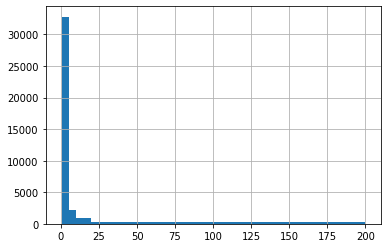

In [269]:
to_process["Nazwa beneficjenta/ Beneficiary name"].value_counts().hist(bins=[0,1,5,10, 20, 200])

In [266]:
to_process

,Nazwa beneficjenta/ Beneficiary name,Priorytet/ Priority axis,Działanie/ Measure,Miejsce realizacji projektu/ Project location,Obszar wsparcia projektu/ Area of project intervention,Cel projektu/ Project thematic objective
356,SPÓŁDZIELCZA MLECZARNIA SPOMLEK,1. Wsparcie prowadzenia prac B+R przez przedsi...,1.1. Projekty B+R przedsiębiorstw,"WOJ.: LUBELSKIE, POW.: radzyński, GM.: Radzyń ...",002 Procesy badawcze i innowacyjne w dużych pr...,"01 Wzmacnianie badań naukowych, rozwoju techno..."
357,PRONAR SPÓŁKA Z OGRANICZONĄ ODPOWIEDZIALNOŚCIĄ,1. Wsparcie prowadzenia prac B+R przez przedsi...,1.1. Projekty B+R przedsiębiorstw,WOJ.: PODLASKIE,002 Procesy badawcze i innowacyjne w dużych pr...,"01 Wzmacnianie badań naukowych, rozwoju techno..."
358,&BDQUO;HSV POLSKA&RDQUO; SP. Z O.O.,1. Wsparcie prowadzenia prac B+R przez przedsi...,1.1. Projekty B+R przedsiębiorstw,"WOJ.: ŁÓDZKIE, POW.: Łódź",002 Procesy badawcze i innowacyjne w dużych pr...,"01 Wzmacnianie badań naukowych, rozwoju techno..."
359,SESCOM SPÓŁKA AKCYJNA,1. Wsparcie prowadzenia prac B+R przez przedsi...,1.1. Projekty B+R przedsiębiorstw,"WOJ.: POMORSKIE, POW.: Gdańsk, GM.: Gdańsk",064 Procesy badawcze i innowacyjne w MŚP (w ty...,"01 Wzmacnianie badań naukowych, rozwoju techno..."
360,CENTRUM BADAWCZO-PRODUKCYJNE ALCOR SP. Z O.O.,1. Wsparcie prowadzenia prac B+R przez przedsi...,1.1. Projekty B+R przedsiębiorstw,"WOJ.: OPOLSKIE, POW.: Opole, GM.: Opole",064 Procesy badawcze i innowacyjne w MŚP (w ty...,"01 Wzmacnianie badań naukowych, rozwoju techno..."
...,...,...,...,...,...,...
90102,WOJEWÓDZTWO ZACHODNIOPOMORSKIE,10. Pomoc Techniczna,10.1. Wsparcie procesów zarządzania i wdrażani...,WOJ.: ZACHODNIOPOMORSKIE,"121 Przygotowanie, wdrażanie, monitorowanie i ...",PT Nie dotyczy (tylko Pomoc techniczna)
90103,WOJEWÓDZTWO ZACHODNIOPOMORSKIE,10. Pomoc Techniczna,10.1. Wsparcie procesów zarządzania i wdrażani...,WOJ.: ZACHODNIOPOMORSKIE,"121 Przygotowanie, wdrażanie, monitorowanie i ...",PT Nie dotyczy (tylko Pomoc techniczna)
90104,WOJEWÓDZTWO ZACHODNIOPOMORSKIE,10. Pomoc Techniczna,10.1. Wsparcie procesów zarządzania i wdrażani...,WOJ.: ZACHODNIOPOMORSKIE,"121 Przygotowanie, wdrażanie, monitorowanie i ...",PT Nie dotyczy (tylko Pomoc techniczna)
90105,WOJEWÓDZTWO ZACHODNIOPOMORSKIE,10. Pomoc Techniczna,10.1. Wsparcie procesów zarządzania i wdrażani...,WOJ.: ZACHODNIOPOMORSKIE,"121 Przygotowanie, wdrażanie, monitorowanie i ...",PT Nie dotyczy (tylko Pomoc techniczna)


In [ ]:
column_id = 5

In [ ]:
column_id +=1
print(df.columns[column_id], column_id)

df[df.columns[column_id]].value_counts()

In [278]:
clean_df = df[[
    df.columns[0],
    df.columns[1],
    df.columns[4], # fundusz - do sprawdzenia 
    df.columns[5], # nazwa programu do sprawdzenia
    df.columns[12],
    df.columns[13],
    df.columns[15],
    df.columns[18],
    df.columns[19],
    df.columns[20],
    df.columns[23],
    df.columns[9]
        
]]

In [279]:
clean_df = clean_df.rename(
    columns={
        'Tytuł projektu/ Project name': 'title',
        'Skrócony opis [do 2000 znaków] / Project summary': 'description',
        'Fundusz/ Fund': 'fund',
        'Program/ Programme': 'programme',
        clean_df.columns[4]: 'eu_financial_rate',
        'Forma finansowania/ Form of finance': 'finance_form',
        'Typ obszaru, na którym realizowany jest projekt/ Territory type': 'territory_type',
        'Projekt konkursowy czy pozakonkursowy/ Project implemented under competitive or non-competitive procedure': 'competitive_procedure',
        'Dziedzina działalności gospodarczej, której dotyczy projekt/ Area of economic activity': 'economic_activity_are',
        'Projekt realizowany w ramach terytorialnych mechanizmów wdrażania/ Project implemented under territorial delivery mechanisms': 'teritorial_delivery_mechanism',
        'Obszar wsparcia projektu/ Area of project intervention': 'area_of_project_intervention',
        clean_df.columns[-1]: 'target'
    }
)

In [295]:
clean_df['eu_financial_rate'] = clean_df['eu_financial_rate'].fillna(0)

In [280]:
clean_df['eu_financial_rate'] = clean_df['eu_financial_rate'].apply(
    lambda x: float(x.replace(',', '.') if isinstance(x, str) else x)
)

In [296]:
Y = clean_df["target"]
X = clean_df.drop("target", axis=1)

In [271]:
clean_df.head()

,title,description,fund,programme,eu_financial_rate,finance_form,territory_type,competitive_procedure,economic_activity_are,area_of_project_intervention,teritorial_delivery_mechanism,target
356,Opracowanie nowatorskiej technologii krojenia ...,Nr_referencyjny_programu_pomocowego: SA.41471(...,EFRR,Program Operacyjny Inteligentny Rozwój,"40,00",01 Dotacja bezzwrotna,07 Nie dotyczy,Konkursowy,03 Produkcja artykułów spożywczych i napojów,002 Procesy badawcze i innowacyjne w dużych pr...,Nie dotyczy,1
357,Mobilna linia przetwarzania odpadów komunalnyc...,Przedmiotem projektu są badania przemysłowe i ...,EFRR,Program Operacyjny Inteligentny Rozwój,"47,68",01 Dotacja bezzwrotna,07 Nie dotyczy,Konkursowy,24 Inne niewyszczególnione usługi,002 Procesy badawcze i innowacyjne w dużych pr...,Nie dotyczy,1
358,Automatyzacja procesu produkcji wyrobów/elemen...,SA.41471(2015/X) Przeznaczenie_pomocy_publiczn...,EFRR,Program Operacyjny Inteligentny Rozwój,"40,27",01 Dotacja bezzwrotna,07 Nie dotyczy,Konkursowy,07 Pozostałe nieokreślone branże przemysłu wyt...,002 Procesy badawcze i innowacyjne w dużych pr...,Nie dotyczy,1
359,Platforama Business Intelligence firmy SESCOM ...,Numer_referencyjny_programu_pomocowego: SA.414...,EFRR,Program Operacyjny Inteligentny Rozwój,"68,84",01 Dotacja bezzwrotna,07 Nie dotyczy,Konkursowy,"13 Działania informacyjno-komunikacyjne, w tym...",064 Procesy badawcze i innowacyjne w MŚP (w ty...,Nie dotyczy,1
360,Opracowanie technologii produkcji jonowych far...,Numer_referencyjny_programu_pomocowego: SA.414...,EFRR,Program Operacyjny Inteligentny Rozwój,"75,85",01 Dotacja bezzwrotna,07 Nie dotyczy,Konkursowy,07 Pozostałe nieokreślone branże przemysłu wyt...,064 Procesy badawcze i innowacyjne w MŚP (w ty...,Nie dotyczy,1


In [272]:
len(clean_df)

78000

In [ ]:
len(df["Numer umowy/decyzji/ Contract number"].unique())

In [11]:
from pandas_profiling import ProfileReport

In [21]:
profile = ProfileReport(clean_df, title="Pandas Profiling Report")

In [22]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [146]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn import preprocessing

def compute_tfidf(train, test, column):
    def convert_features(ft):
        names = np.arange(25)
        textual_features = [
        {
            f'{column}_tfidf_{col_name}':ft[row_id, col_id]
            for col_id, col_name in enumerate(names)
        }
            for row_id in range(len(ft)) 
        ]
        return pd.DataFrame(textual_features)
    
    vectorizer = TfidfVectorizer()
    svd = TruncatedSVD(n_components=25)

    ft_train = vectorizer.fit_transform(train[column])
    ft_train = svd.fit_transform(ft_train)
    ft_test = svd.transform(vectorizer.transform(test[column]))
    
    train = train.drop(column, axis=1)
    test = test.drop(column, axis=1)
    
    ft_train = convert_features(ft_train)
    ft_test = convert_features(ft_test)
    
    ft_train.index = train.index
    ft_test.index = test.index
    
    train = pd.concat([train, ft_train], axis=1)
    test = pd.concat([test, ft_test], axis=1)
    return train, test


def encode_labels(train, test, column):
    label_encoder = preprocessing.LabelEncoder()
    train[column] = label_encoder.fit_transform(train[column])
    test[column] = label_encoder.transform(test[column])
    
    return train, test



def one_hot_encoding(train, test, column):
    encoder = preprocessing.LabelBinarizer()
    ft = encoder.fit_transform(X_train[column])
    names = encoder.classes_

    train_ft = pd.DataFrame(ft)
    train_ft.columns = [f"{column}_{it}" for it in names]
    
    test_ft = encoder.transform(X_test[column])
    test_ft = pd.DataFrame(test_ft)
    test_ft.columns = [f"{column}_{it}" for it in names]
    
    train = train.drop(column, axis=1)
    test = test.drop(column, axis=1)
    
    train_ft.index = train.index
    test_ft.index = test.index
    
    train = pd.concat([train, train_ft], axis=1)
    test = pd.concat([test, test_ft], axis=1)
    return train, test

    

In [81]:
to_encode_cols = [
    'fund', 
    'programme', 
    'finance_form', 
    'territory_type', 
    'competitive_procedure', 
    'economic_activity_are', 
    'area_of_project_intervention', 
    'teritorial_delivery_mechanism'
]


In [281]:
Y = clean_df["target"]
X = clean_df.drop("target", axis=1)

In [147]:
from sklearn.model_selection import train_test_split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, Y, random_state=476)

In [123]:
X_train, X_test = compute_tfidf(X_train_raw, X_test_raw, column="title")
X_train, X_test = compute_tfidf(X_train, X_test, column="description")

In [252]:
X_train = X_train_raw.copy().drop(['title', 'description'], axis=1)
X_test = X_test_raw.copy().drop(['title', 'description'], axis=1)

In [253]:
X_train['eu_financial_rate'] = X_train['eu_financial_rate'].apply(
    lambda x: float(x.replace(',', '.') if isinstance(x, str) else x)
)
X_test['eu_financial_rate'] =  X_test['eu_financial_rate'].apply(
    lambda x: float(x.replace(',', '.') if isinstance(x, str) else x)
)


In [254]:
for col in to_encode_cols:
    # X_train, X_test = encode_labels(X_train, X_test, col)
    X_train, X_test = one_hot_encoding(X_train, X_test, col)

In [151]:
from xgboost import XGBClassifier, DMatrix

In [255]:
clf = XGBClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[02:44:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## LABEL ONE-HOT

In [256]:
print(classification_report(y_true=y_train, y_pred=clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79     21883
           1       0.80      0.85      0.83     24917

    accuracy                           0.81     46800
   macro avg       0.81      0.81      0.81     46800
weighted avg       0.81      0.81      0.81     46800



In [257]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.78      7359
           1       0.79      0.84      0.81      8241

    accuracy                           0.80     15600
   macro avg       0.80      0.79      0.80     15600
weighted avg       0.80      0.80      0.80     15600



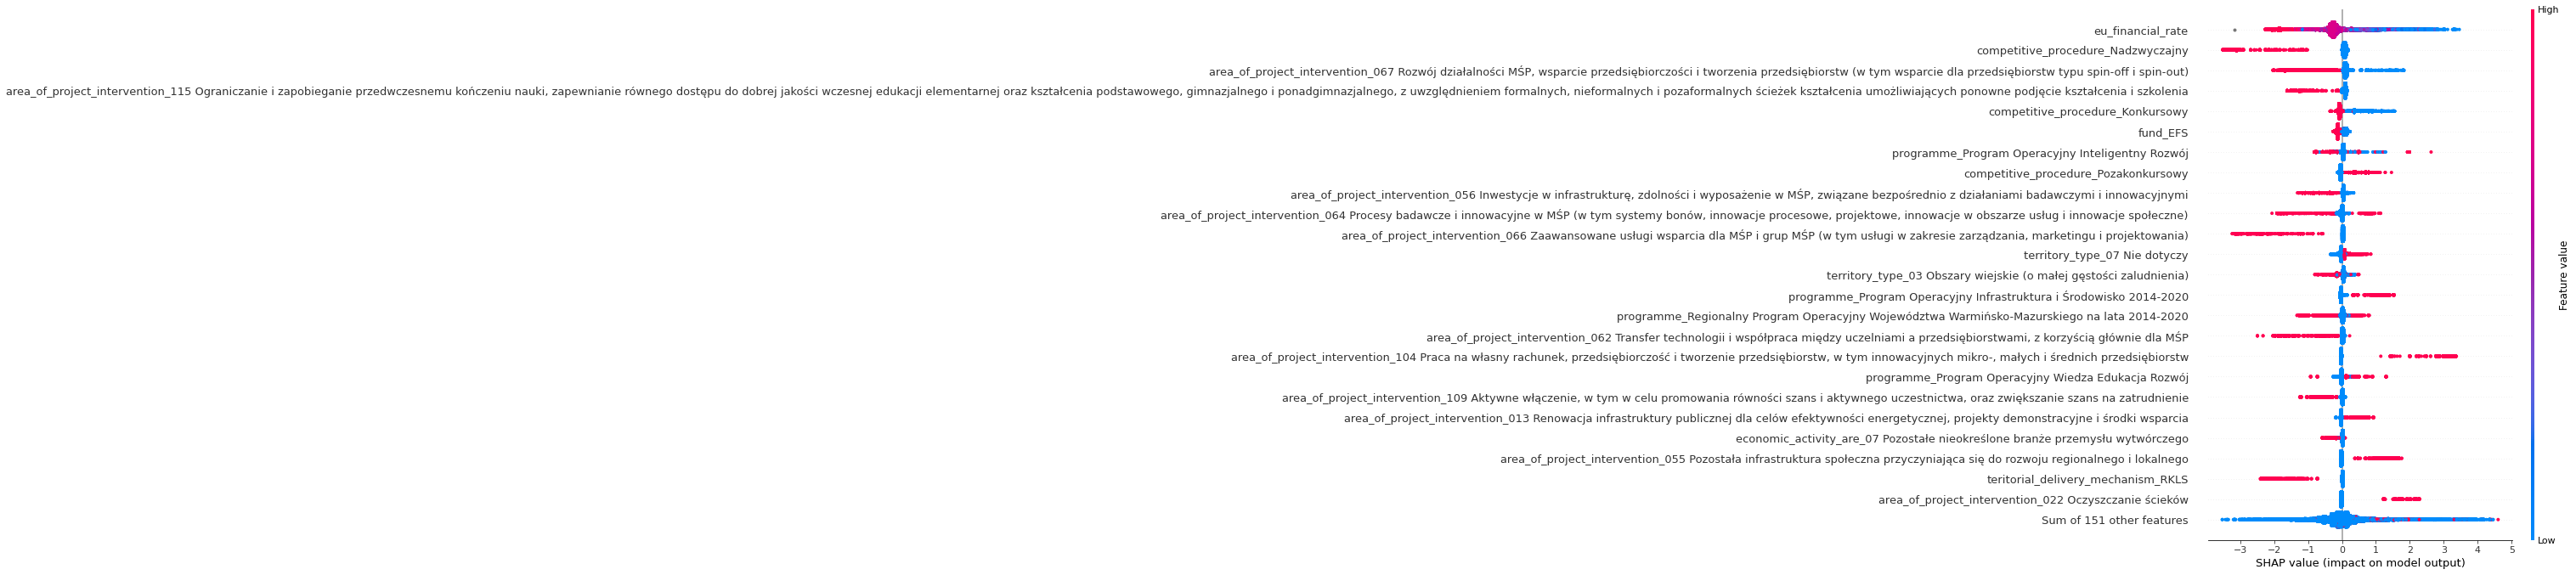

In [155]:
import shap
shap.initjs()  # Inicjalizacja obsługi wizualizacji opartych na JavaScript w notebooku
explainer = shap.TreeExplainer(clf)  # Inicjalizacja modułu dla konkretnego modelu
shap_values = explainer(X_train)
shap.plots.beeswarm(shap_values, max_display=25)

# LABEL BINARIZATION

In [102]:
from sklearn.metrics import classification_report

In [103]:
print(classification_report(y_true=y_train, y_pred=clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80     27356
           1       0.81      0.86      0.83     31144

    accuracy                           0.82     58500
   macro avg       0.82      0.82      0.82     58500
weighted avg       0.82      0.82      0.82     58500



In [105]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78      9145
           1       0.79      0.84      0.82     10355

    accuracy                           0.80     19500
   macro avg       0.80      0.80      0.80     19500
weighted avg       0.80      0.80      0.80     19500



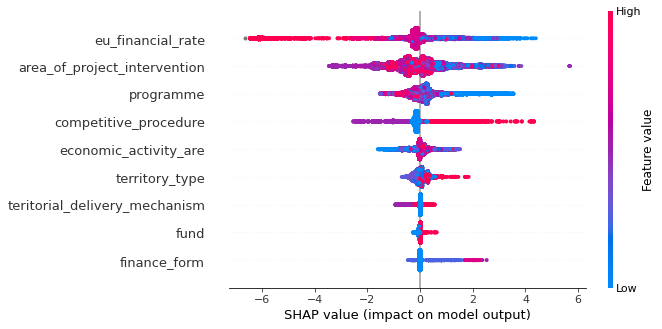

In [106]:
import shap
shap.initjs()  # Inicjalizacja obsługi wizualizacji opartych na JavaScript w notebooku
explainer = shap.TreeExplainer(clf)  # Inicjalizacja modułu dla konkretnego modelu
shap_values = explainer(X_train)
shap.plots.beeswarm(shap_values, max_display=25)

In [ ]:
import shap
shap.initjs()  # Inicjalizacja obsługi wizualizacji opartych na JavaScript w notebooku
explainer = shap.TreeExplainer(clf)  # Inicjalizacja modułu dla konkretnego modelu
shap_values = explainer(X)
shap.plots.beeswarm(shap_values, max_display=25)

# Konkurs

# Split

In [ ]:
# Ocenienia
# Wyżej niż dummy: 13 pkt
# Wyżej niż 0.75: 25 pkt
# TOP3 + 5pkt

In [297]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, Y, random_state=476, test_size=0.4)

In [298]:
X_test_raw, X_dev_raw, y_test, y_dev = train_test_split(X_test_raw, y_test, random_state=476, test_size=0.5)

In [284]:
X_train_raw

,title,description,fund,programme,eu_financial_rate,finance_form,territory_type,competitive_procedure,economic_activity_are,area_of_project_intervention,teritorial_delivery_mechanism
84065,Gmina Susz stawia na seniorów! -utworzenie Klu...,Głównym celem projektu jest wzrost dostępności...,EFS,Regionalny Program Operacyjny Województwa Warm...,84.68,01 Dotacja bezzwrotna,02 Małe obszary miejskie (o ludności >5 000 i ...,Konkursowy,24 Inne niewyszczególnione usługi,"112 Ułatwianie dostępu do przystępnych cenowo,...",Nie dotyczy
73453,Zapobieganie wykluczeniu społecznemu dzieci i ...,Projekt pt.: „Zapobieganie wykluczeniu społecz...,EFS,Regionalny Program Operacyjny Województwa Śląs...,85.00,01 Dotacja bezzwrotna,03 Obszary wiejskie (o małej gęstości zaludnie...,Konkursowy,"21 Działalność w zakresie opieki społecznej, u...","112 Ułatwianie dostępu do przystępnych cenowo,...",ZIT
82999,"„Rozbudowa Bazy Rehabilitacyjnej, która umożli...",Przedmiotem inwestycji jest rozbudowa(nadbudow...,EFRR,Regionalny Program Operacyjny Województwa Warm...,81.00,01 Dotacja bezzwrotna,03 Obszary wiejskie (o małej gęstości zaludnie...,Konkursowy,20 Opieka zdrowotna,053 Infrastruktura ochrony zdrowia,Nie dotyczy
50298,MOBILNE LABORATORIUM FILMOWE,"Projekt pn. ""Mobilne laboratorium filmowe"" rea...",EFRR,Regionalny Program Operacyjny Województwa Mazo...,39.90,01 Dotacja bezzwrotna,01 Duże obszary miejskie (o ludności >50 000 i...,Konkursowy,24 Inne niewyszczególnione usługi,"067 Rozwój działalności MŚP, wsparcie przedsię...",Nie dotyczy
19171,Aktywizacja osób młodych pozostających bez pra...,Celem projektu jest zwiększenie możliwości zat...,EFS,Program Operacyjny Wiedza Edukacja Rozwój,84.28,01 Dotacja bezzwrotna,07 Nie dotyczy,Pozakonkursowy,18 Administracja publiczna,103 Trwała integracja na rynku pracy ludzi mło...,Nie dotyczy
...,...,...,...,...,...,...,...,...,...,...,...
8534,Ekspansja zagraniczna firmy LBM Kamil Szarek d...,SA 42799(2015/X) Wnioskodawca weźmie udział w ...,EFRR,Program Operacyjny Inteligentny Rozwój,85.00,01 Dotacja bezzwrotna,07 Nie dotyczy,Konkursowy,04 Wytwarzanie tekstyliów i wyrobów włókiennic...,"056 Inwestycje w infrastrukturę, zdolności i w...",Nie dotyczy
36272,Rozwój potencjału innowacji firmy MICHOR Sp j....,Projektowana praca badawczo-rozwojowa ma na ce...,EFRR,Regionalny Program Operacyjny Województwa Łódz...,55.00,01 Dotacja bezzwrotna,02 Małe obszary miejskie (o ludności >5 000 i ...,Konkursowy,07 Pozostałe nieokreślone branże przemysłu wyt...,"056 Inwestycje w infrastrukturę, zdolności i w...",Nie dotyczy
66734,Podniesienie umiejętności kluczowych gimnazjal...,Cel: Podniesienie jakości i atrakcyjności kszt...,EFS,Regionalny Program Operacyjny Województwa Podk...,85.00,01 Dotacja bezzwrotna,03 Obszary wiejskie (o małej gęstości zaludnie...,Konkursowy,19 Edukacja,115 Ograniczanie i zapobieganie przedwczesnemu...,Nie dotyczy
18004,Podniesienie konkurencyjności firmy na rynkach...,Działania wynikają bezpośrednio ze Strategii i...,EFRR,Program Operacyjny Polska Wschodnia,60.00,01 Dotacja bezzwrotna,07 Nie dotyczy,Konkursowy,07 Pozostałe nieokreślone branże przemysłu wyt...,064 Procesy badawcze i innowacyjne w MŚP (w ty...,Nie dotyczy


In [285]:
X_train_raw.reset_index(drop=True, inplace=True)
y_train.index = X_train_raw.index
X_dev_raw.reset_index(drop=True, inplace=True)
y_dev.index = X_dev_raw.index
X_test_raw.reset_index(drop=True, inplace=True)
y_test.index = X_test_raw.index

In [182]:
from sklearn.dummy import DummyClassifier

In [198]:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train_raw, y_train)

DummyClassifier(strategy='stratified')

In [201]:
y_pred = dummy_clf.predict(X_test_raw)

In [203]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.47      0.47      0.47      7359
           1       0.53      0.53      0.53      8241

    accuracy                           0.50     15600
   macro avg       0.50      0.50      0.50     15600
weighted avg       0.50      0.50      0.50     15600



In [216]:
from sklearn.metrics import f1_score

In [218]:
f1_score(y_true=y_test, y_pred=y_pred, average='micro')

0.5001923076923077

In [264]:
pd.concat([y_train, y_dev], ignore_index=True)

0        0
1        0
2        1
3        1
4        1
        ..
62395    0
62396    1
62397    0
62398    1
62399    0
Name: target, Length: 62400, dtype: int64

In [214]:
def create_submission_file(y_pred: np.ndarray, filepath: str = 'submission.csv'):
    y_pred = pd.DataFrame(y_pred, columns=['Predicted'])
    y_pred.index.name = 'Id'
    y_pred.to_csv(filepath)

In [215]:
create_submission_file(y_pred)

In [189]:
!ls

Projekty_EU.ipynb _toc.yml          docs              mlflow.db
README.md         artifacts         examples          publish.sh
_build            build.sh          laboratoria       requirements.txt
_config.yml       cache             lid.176.bin       zadania


In [299]:
X_train_raw.to_csv('../pdiow-challenge/dataset/x_train.csv')
X_test_raw.to_csv('../pdiow-challenge//dataset/x_test.csv')
X_dev_raw.to_csv('../pdiow-challenge//dataset/x_dev.csv')
y_test.to_csv('../pdiow-challenge//dataset/y_test.csv')
y_dev.to_csv('../pdiow-challenge//dataset/y_dev.csv')
y_train.to_csv('../pdiow-challenge//dataset/y_train.csv')

In [187]:
dataset = {
    'X_train': X_train_raw,
    'X_dev': X_dev_raw,
    'X_test': X_test_raw,
    'y_train': y_train,
    'y_dev': y_dev
}

In [219]:
from dataclasses import dataclass

In [221]:
isinstance(y_train, pd.Series)

True

In [220]:
type(y_train)

pandas.core.series.Series

In [260]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn import metrics
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')

In [222]:
PATHS = {
    'X_train': 'challange/dataset/x_train.csv',
    'y_train': 'challange/dataset/y_train.csv',
    'X_dev': 'challange/dataset/x_dev.csv',
    'y_dev': 'challange/dataset/y_dev.csv',
    'X_test': 'challange/dataset/x_test.csv'
}

In [262]:
scores

array([0.79664078, 0.79996528, 0.79782597, 0.79366506, 0.79108435])

In [261]:
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_macro')

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[02:45:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[02:45:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[02:45:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[02:46:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[02:46:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [259]:
clf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [224]:
from typing import Dict

In [237]:
@dataclass
class PDIOWChallangeDataset:
    X_train: pd.DataFrame
    X_dev: pd.DataFrame
    X_test: pd.DataFrame
    y_train: pd.Series
    y_dev: pd.Series
    merge_train_dev_split: bool = False
        
    def __init__(self, paths: Dict[str, str] = PATHS) -> None:
        self.load(paths)
        
    def load(self, paths: Dict[str, str], merge_train_dev_split) -> None:
        self.X_train = pd.read_csv(PATHS['X_train'], index_col=0)
        self.X_dev = pd.read_csv(PATHS['X_dev'], index_col=0)
        self.X_test = pd.read_csv(PATHS['X_test'], index_col=0)
        self.y_train = pd.read_csv(PATHS['y_train'], index_col=0)
        self.y_dev = pd.read_csv(PATHS['y_dev'], index_col=0)
        
        

    

In [238]:
ds = PDIOWChallangeDataset(PATHS)

In [ ]:
    RANDOM_STATE = 476


In [248]:
from typing import Callable, Any

In [250]:
from abc import ABC, abstractmethod

class AbstractEvaluator(ABC):
    
    @abstractmethod
    def evaluate():
        pass
    
    @staticmethod
    def _calculate_score(y_true: np.ndarray, y_pred: np.ndarray):
        return f1_score(y_true=y_true, y_pred=y_pred, average='micro')



    
@dataclass
class PDIOWCVChallangeEvaluator(AbstractEvaluator):
    y_true: np.ndarray
    y_pred: np.ndarray
                
    def evaluate(self):
        return f1_score(y_true=self.y_true, y_pred=self.y_pred, average='micro')

SyntaxError: invalid syntax (<ipython-input-250-a645be8d2fcb>, line 24)

In [247]:
PDIOWChallangeEvaluator(y_true=y_test, y_pred=y_pred).evaluate()

0.5001923076923077

In [ ]:
def evaluat